para los árboles de decisión, no todas las variables necesitan ser numéricas, tmb pueden ser categóricas (por ejemplo, altura => baja, media, alta).
calculo la entropía para toda y cada una de las variables; calculamos la ganancia y pérdida de las variables para determinar la característica de la decisión y su treshold. a nivel computacional se deben hacer muchas iteraciones x cada dato. 
**¿entropía?** => 1 si nuestros datos son más heterogéneos!!! si es 0, nodo puro (clases fácilmente distinguibles entre sí) (creoooo???)

*ventajas*
* son fáciles de entender e interpretar, pq se parecen a las decisiones humanas (si pasa esto, entonces hago esto)
* podemos captar relaciones no lineales tmb!! lo único q interesa es q en algún momento tomaremos una decisión (sí / no)
* rápido para entrenar y hacer predicciones (datasets pequeños / medianos) => así no tarda tanto. 
* tmb podemos visualizar el árbol que se generó al tomar las decisiones!!!
*desventajas*:
* fácilmente sobreajustable => si lo dejamos crecer hasta q llegue a todas las hojas, tendrá un error = 0; pero esto mismo garantiza un sobre-ajuste; por lo q se recomenda crear la poda del árbol (delimitar el número de nodos que se tomarán en cuenta)
* es sensible a los datos => el modelo es para los datos q le damos!!! ejemplo de alturas de población japonesa vs alemana
* si hay clases desbalanceadas, tenderá a favorecer a la clase mayoritaria. => menor es el valor de la entropía en este caso
*¿cuándo sí utilizarlo?*
* cuando tenemos problemas explicables! => cuando necesitamos demostrar el por qué de una predicción
* al crear una primera versión del modelo para entender las relaciones importantes en los datos
* cuando nuestro hardware es limitado => datasets pequeños o medianos

parámetros => n
criterios: entropía, gini, log_loss
splitter: estrategia para dividir cada nodo => "best" x hiperparámetro tenemos la mejor

hiperparámetros => no necesariamente debemos modificar. nosotros definimos estas cosas, podemos primero dejar correr todo para ver q tanto crece el árbol (análisis exploratorio) e ir mediando si quitamos la mitad de los nodos
* max_depth: es un ENTERO x dafult como None. máxima profundidad a la que puede llegar el árbol. si está como None, los nodos se expanden hasta llegar a todas las hojas. 
* min_samples_split: puede ser entero o flotante¿ => es el número mínimo de muestras requeridas para dividir a la siguiente rama

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\SEXTO SEMESTRE\modelos II python\Neurociencias-2025-2\S03_datasets\iris\iris.csv"
df = pd.read_csv(path)

In [4]:
df.value_counts()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species   
5.8           2.7          5.1           1.9          virginica     2
6.2           2.2          4.5           1.5          versicolor    1
              2.9          4.3           1.3          versicolor    1
              3.4          5.4           2.3          virginica     1
6.3           2.3          4.4           1.3          versicolor    1
                                                                   ..
5.4           3.9          1.3           0.4          setosa        1
                           1.7           0.4          setosa        1
5.5           2.3          4.0           1.3          versicolor    1
              2.4          3.7           1.0          versicolor    1
7.9           3.8          6.4           2.0          virginica     1
Name: count, Length: 149, dtype: int64

In [5]:
df.describe(include = "all") # análisis descriptivo de los datos

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # usamos el classifier si queremos clasificar los tipos de flores / el regressor para una regresión

In [9]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 99)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=99)

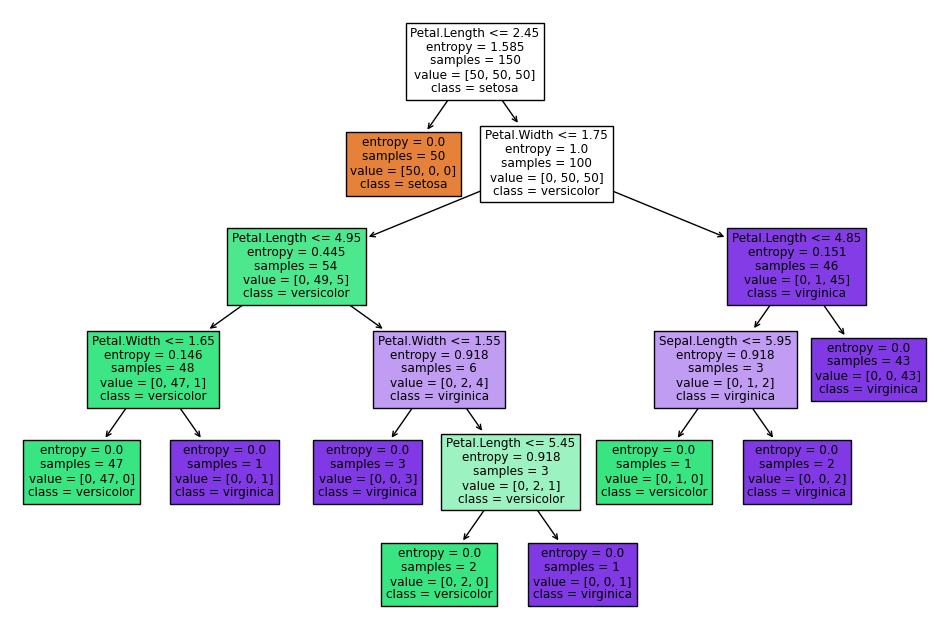

In [11]:
plt.figure(figsize = (12, 8))
plot_tree(clf, filled=True, feature_names = df.columns[:-1], class_names = df["Species"].unique())
plt.show() # a la izquierda es true (viéndolo de frente XD)

tarea => q solo haga tres divisiones. (modificar los hiperparámetros necesarios); y sacar la matriz de confusión!